In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [212]:
# LOAD THE DATASET :
df = pd.read_csv("../Data/raw/subset_data.csv")
# DISPLAY THE FIRST 5 ROWS :
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [214]:
# SHAPE OF THE DATASET :
print(f"Shape of the dataset : {df.shape}")

Shape of the dataset : (10000, 9)


In [216]:
# COLUMNS INFORMATIONS :
print("Column Count,Names and The data type (dtype) of each column :")
df.info()

Column Count,Names and The data type (dtype) of each column :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    10000 non-null  object 
 1   user_id      10000 non-null  object 
 2   business_id  10000 non-null  object 
 3   stars        10000 non-null  float64
 4   useful       10000 non-null  int64  
 5   funny        10000 non-null  int64  
 6   cool         10000 non-null  int64  
 7   text         10000 non-null  object 
 8   date         10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.3+ KB


In [218]:
# STATISTICS OF NUMERICAL COLUMNS :
df.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.854300,0.889100,0.246500,0.335500
std,1.346719,2.092329,0.885221,1.051023
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,91.000000,26.000000,44.000000


In [220]:
# CHECKING FOR DUPLICATED VALUES :
df_duplicates = df.duplicated()
print(f"number of duplicated rows : {df_duplicates.sum()}")

number of duplicated rows : 0


In [222]:
# CHECKING FOR MISSING VALUES :
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

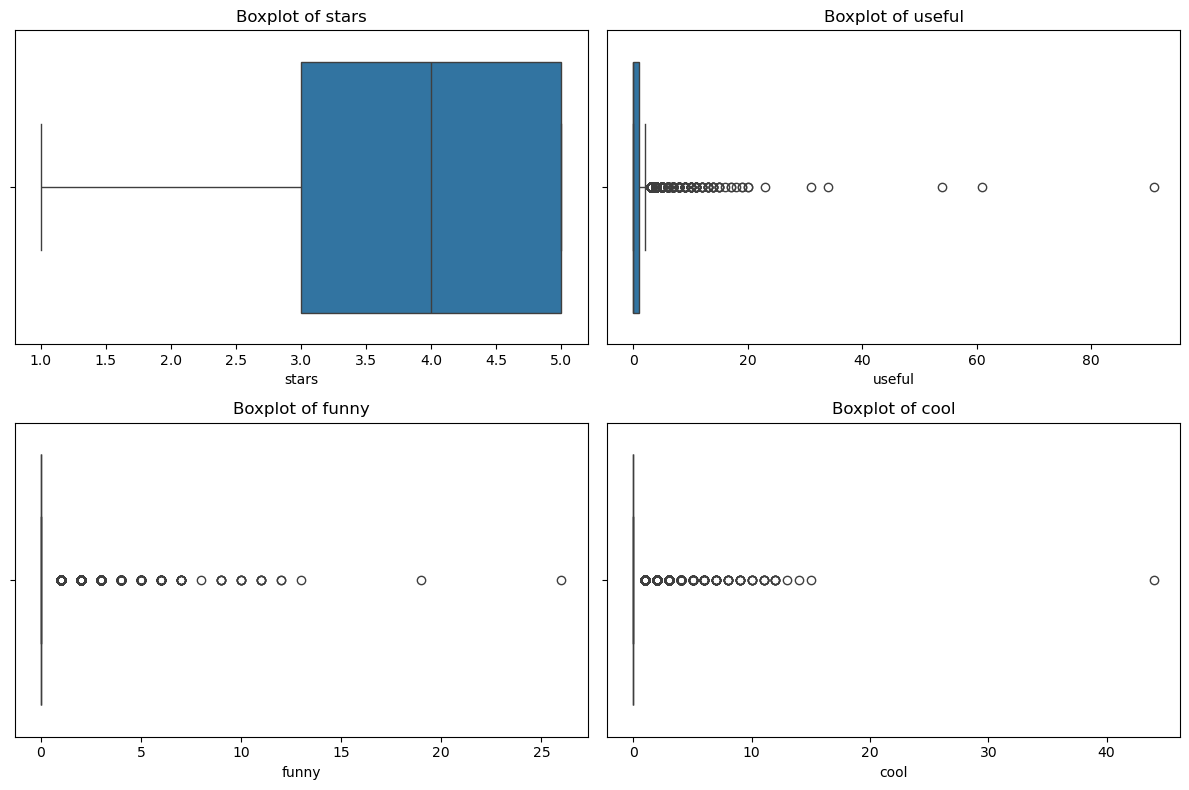

In [224]:
# CHECKING FOR OUTLIERS IN NUMERICAL COLUMNS :
plt.figure(figsize=(12, 8))

# Create a list of columns to plot
columns = ['stars', 'useful', 'funny', 'cool']

# Plot boxplots for each column
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Create 2x2 subplot
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

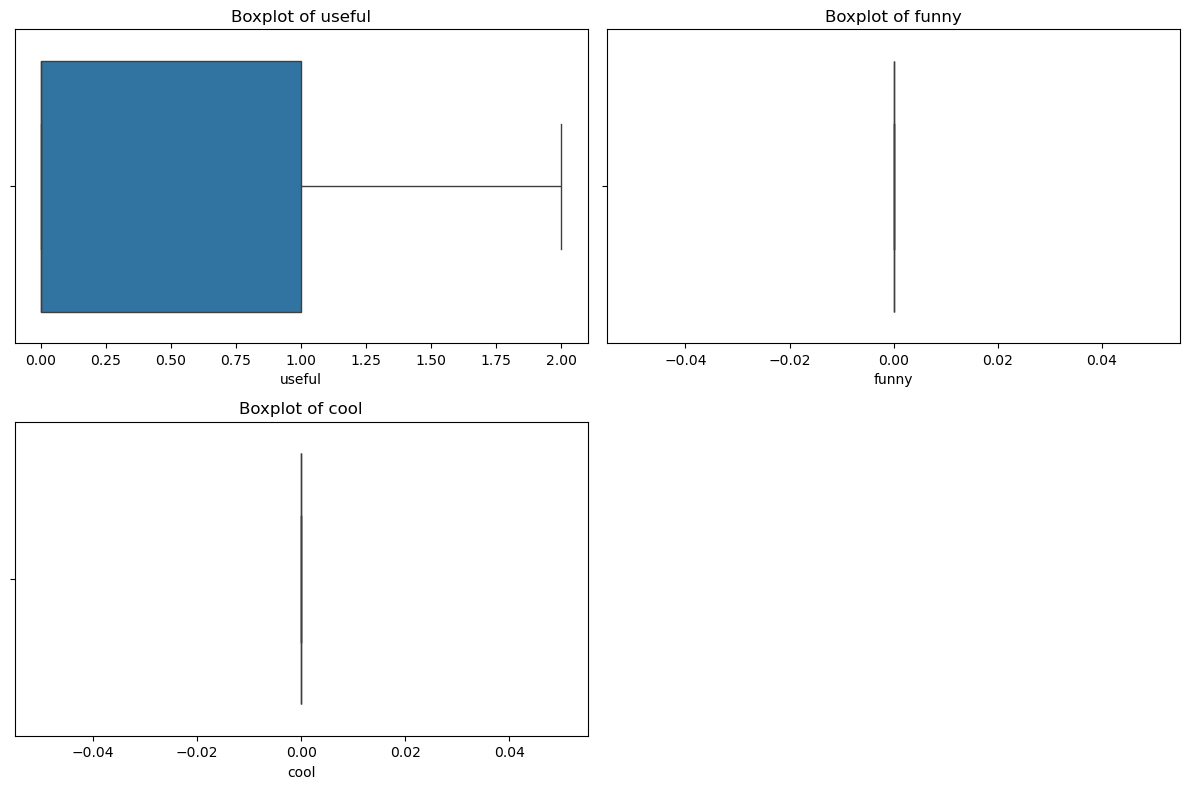

In [226]:
# HANDLING OUTLIERS USING IQR METHOD :
outliers_col = ['useful', 'funny', 'cool']

plt.figure(figsize=(12, 8))

# Loop through each column and handle outliers
for i, col in enumerate(outliers_col, 1):
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify and drop outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    df = df.drop(outliers.index)
    
    # Plot boxplot to visualize after outliers removal
    plt.subplot(2, 2, i)  # Create 2x2 subplot
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show all boxplots
plt.show()

In [228]:
# HOW MANY UNIQUE STARS :
print(df.stars.unique())
# DISTRIBUTION FOR EACH STAR VALUE :
star_counts = df.stars.value_counts()
star_counts

[3. 5. 4. 2. 1.]


stars
5.0    3272
4.0    1799
3.0     831
1.0     696
2.0     532
Name: count, dtype: int64

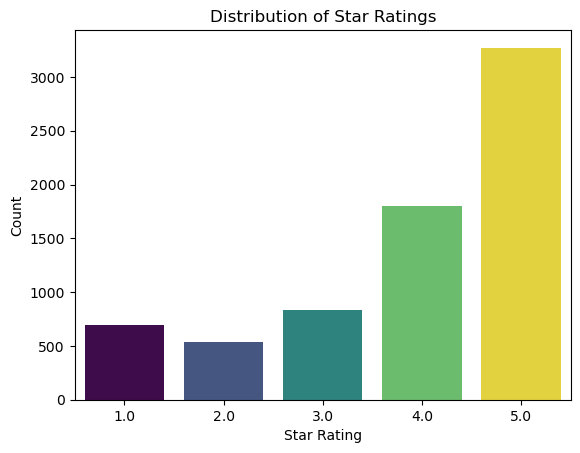

In [96]:
# VISUALIZING THE DISTRIBUTION OF STARS VALUES :

# Convert to a DataFrame for sns.barplot compatibility with hue
star_counts_df = star_counts.reset_index()
star_counts_df.columns = ['stars', 'count']

# Creating a bar plot for visualization of the distribution 
sns.barplot(data=star_counts_df, x='stars', y='count', hue='stars', palette="viridis", legend=False)
# Adding title and labels
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


In [230]:
# ASSINING EACH STAR VALUE A SENTIMENT :
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive'

In [232]:
# NEW DATASET :
new_df= df[['stars', 'sentiment','text']]
# DISPLAY THE FIRST 5 ROWS
new_df.head()

,stars,sentiment,text
0,3.0,neutral,"If you decide to eat here, just be aware it is..."
2,3.0,neutral,Family diner. Had the buffet. Eclectic assortm...
7,5.0,positive,Amazingly amazing wings and homemade bleu chee...
9,3.0,neutral,Had a party of 6 here for hibachi. Our waitres...
10,5.0,positive,My experience with Shalimar was nothing but wo...


In [236]:
# PREPERING TEXT :
# Convert Text to Lowercase
new_df.loc[:,'text']=new_df['text'].str.lower()

In [238]:
# Get Rid of Unwanted Characters Such As Punctuation Marks
new_df.loc[:, 'text'] = new_df['text'].str.replace(r'[^\w\s]', '')

In [240]:
# Remove Numbers
new_df.loc[:,'text']=new_df['text'].str.replace(r'\d+', '') 

In [242]:
# Replace Newline and Carriage Return Characters
new_df.loc[:,'text']=new_df['text'].str.replace('\n',' ').str.replace('\r','')

In [244]:
# DISPLAY THE FIRST 5 ROWS AFTER CLEANING THE 'text' COLUMN
new_df.set_index(np.arange(0,7130),inplace=True)
new_df.head()

,stars,sentiment,text
0,3.0,neutral,"if you decide to eat here, just be aware it is..."
1,3.0,neutral,family diner. had the buffet. eclectic assortm...
2,5.0,positive,amazingly amazing wings and homemade bleu chee...
3,3.0,neutral,had a party of 6 here for hibachi. our waitres...
4,5.0,positive,my experience with shalimar was nothing but wo...


In [267]:
# CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
new_df.loc[:, 'length'] = new_df['text'].apply(len)
new_df.head()

,stars,sentiment,text,length,processed_text
0,3.0,neutral,"if you decide to eat here, just be aware it is...",513,decid eat awar go take hour begin end tri mult...
1,3.0,neutral,family diner. had the buffet. eclectic assortm...,339,famili diner buffet eclect assort larg chicken...
2,5.0,positive,amazingly amazing wings and homemade bleu chee...,192,amazingli amaz wing homemad bleu chees ribey t...
3,3.0,neutral,had a party of 6 here for hibachi. our waitres...,524,parti hibachi waitress brought separ sushi ord...
4,5.0,positive,my experience with shalimar was nothing but wo...,1009,experi shalimar noth wonder want get engag rin...


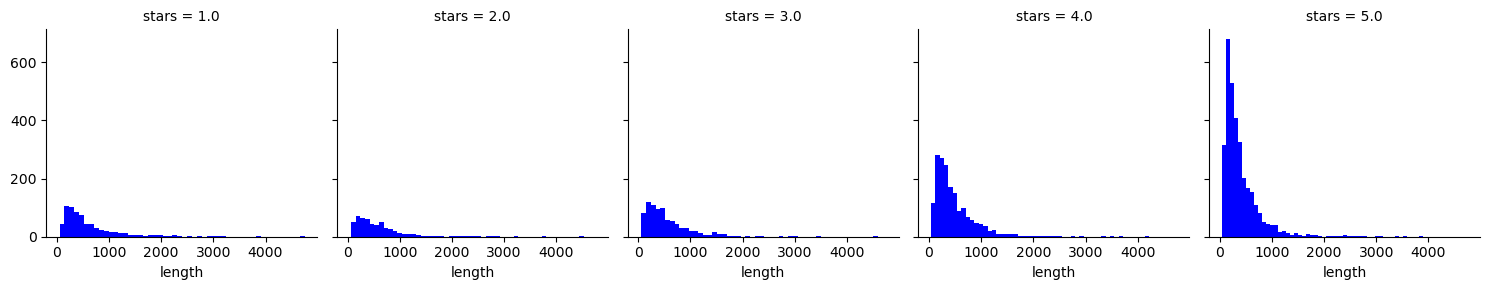

In [248]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=new_df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

In [169]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHAKOR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHAKOR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [266]:
# process the text and reduce it to its stemmed form

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Tokenization, stopword removal, and stemming
new_df.loc[:, 'processed_text'] = new_df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x.lower()) if word not in stop_words and word.isalpha()]))

In [264]:
new_df.head()

,stars,sentiment,text,length,processed_text
0,3.0,neutral,"if you decide to eat here, just be aware it is...",513,decid eat awar go take hour begin end tri mult...
1,3.0,neutral,family diner. had the buffet. eclectic assortm...,339,famili diner buffet eclect assort larg chicken...
2,5.0,positive,amazingly amazing wings and homemade bleu chee...,192,amazingli amaz wing homemad bleu chees ribey t...
3,3.0,neutral,had a party of 6 here for hibachi. our waitres...,524,parti hibachi waitress brought separ sushi ord...
4,5.0,positive,my experience with shalimar was nothing but wo...,1009,experi shalimar noth wonder want get engag rin...
